In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,ElasticNet,Lasso
from sklearn.model_selection import train_test_split
import scipy.stats as stat
import pylab
from sklearn.metrics import mean_squared_error

In [4]:
df=pd.read_csv(r'C:\Users\my computer\Documents\Data Science\Assignments\Multi Linear Regression\50_Startups.csv',)

In [5]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
df.duplicated().sum()

0

In [9]:
df.corr()

C:\Users\my computer\AppData\Local\Temp\ipykernel_1536\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


C:\Users\my computer\AppData\Local\Temp\ipykernel_1536\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

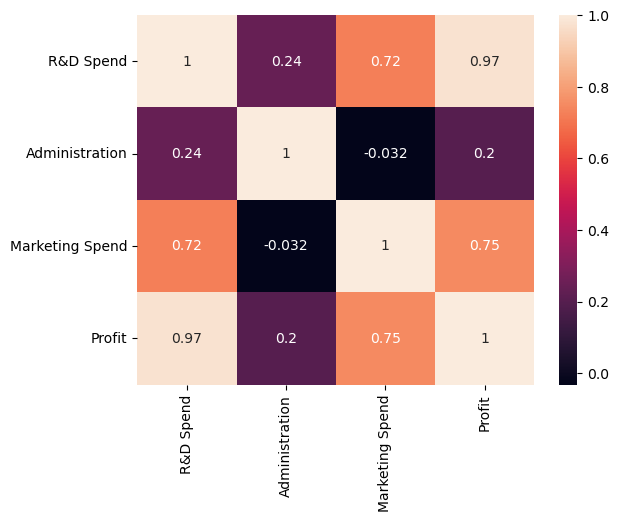

In [10]:
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'Profit')

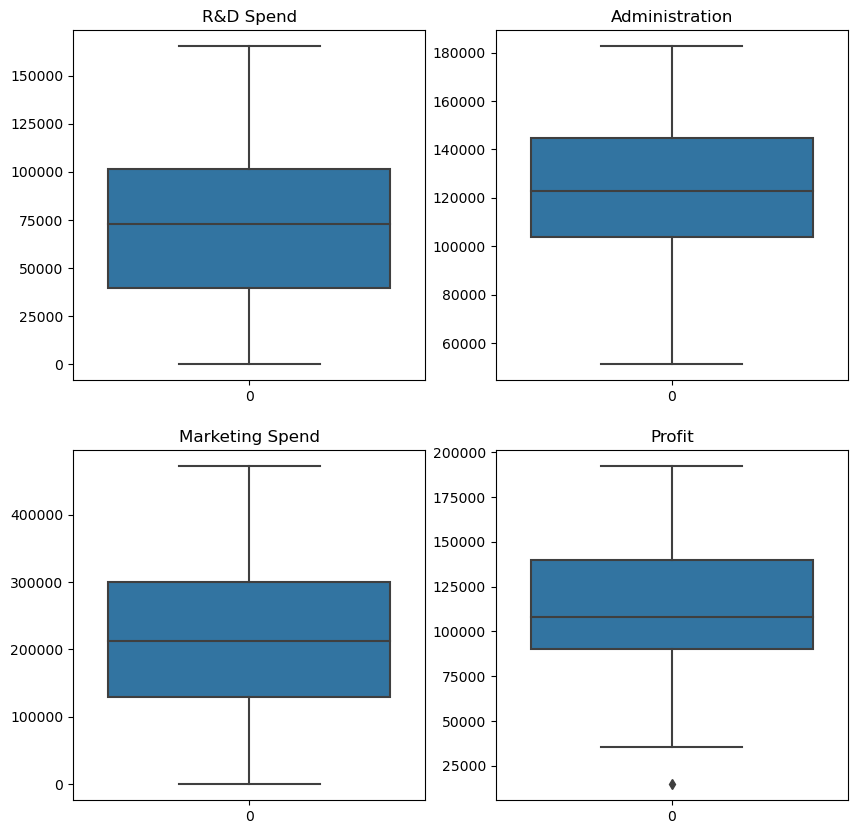

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['R&D Spend'])
plt.title('R&D Spend')
plt.subplot(2,2,2)
sns.boxplot(df['Administration'])
plt.title('Administration')
plt.subplot(2,2,3)
sns.boxplot(df['Marketing Spend'])
plt.title('Marketing Spend')
plt.subplot(2,2,4)
sns.boxplot(df['Profit'])
plt.title('Profit')

In [12]:
Q3=139765.977500
Q1=90138.902500
Q2=107978.190000
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
for i in df['Profit']:
    if ((i<LB) or (i>UB)):
       print(i)

14681.4


In [13]:
df.drop(49,axis=0,inplace=True)

In [14]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Text(0.5, 1.0, 'Profit')

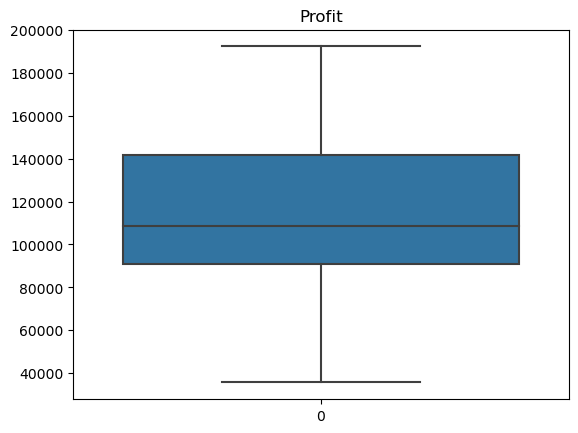

In [15]:
sns.boxplot(df['Profit'])
plt.title('Profit')

Text(0.5, 1.0, 'Profit')

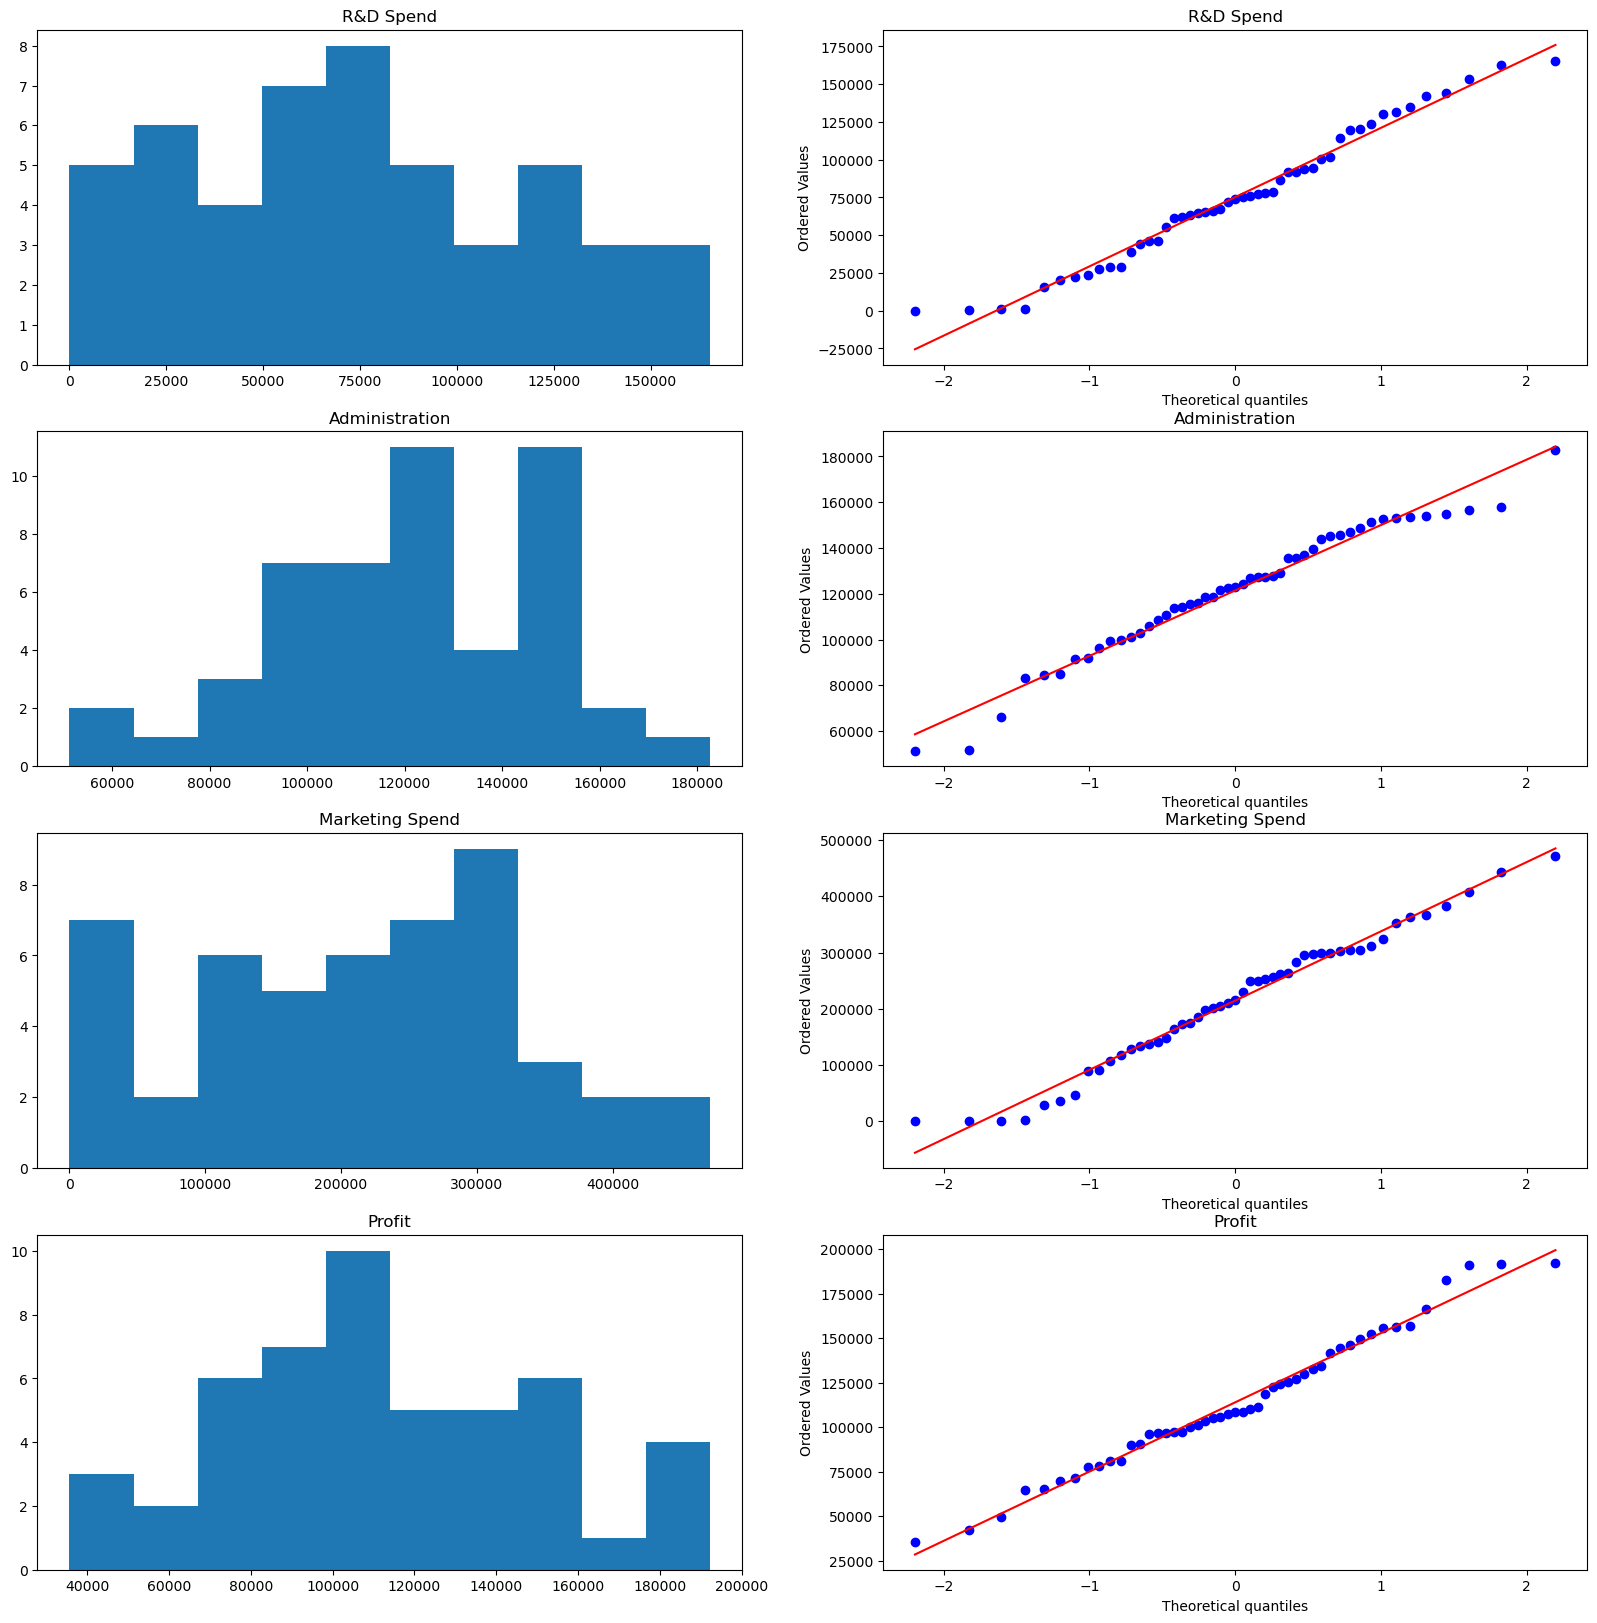

In [16]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
plt.hist(df['R&D Spend'])
plt.title('R&D Spend')
plt.subplot(4,2,2)
stat.probplot(df['R&D Spend'],dist='norm',plot=pylab)
plt.title('R&D Spend')
plt.subplot(4,2,3)
plt.hist(df['Administration'])
plt.title('Administration')
plt.subplot(4,2,4)
stat.probplot(df['Administration'],dist='norm',plot=pylab)
plt.title('Administration')
plt.subplot(4,2,5)
plt.hist(df['Marketing Spend'])
plt.title('Marketing Spend')
plt.subplot(4,2,6)
stat.probplot(df['Marketing Spend'],dist='norm',plot=pylab)
plt.title('Marketing Spend')
plt.subplot(4,2,7)
plt.hist(df['Profit'])
plt.title('Profit')
plt.subplot(4,2,8)
stat.probplot(df['Profit'],dist='norm',plot=pylab)
plt.title('Profit')

In [17]:
### Relation between independent variables with dependent variables

<Axes: xlabel='State', ylabel='Profit'>

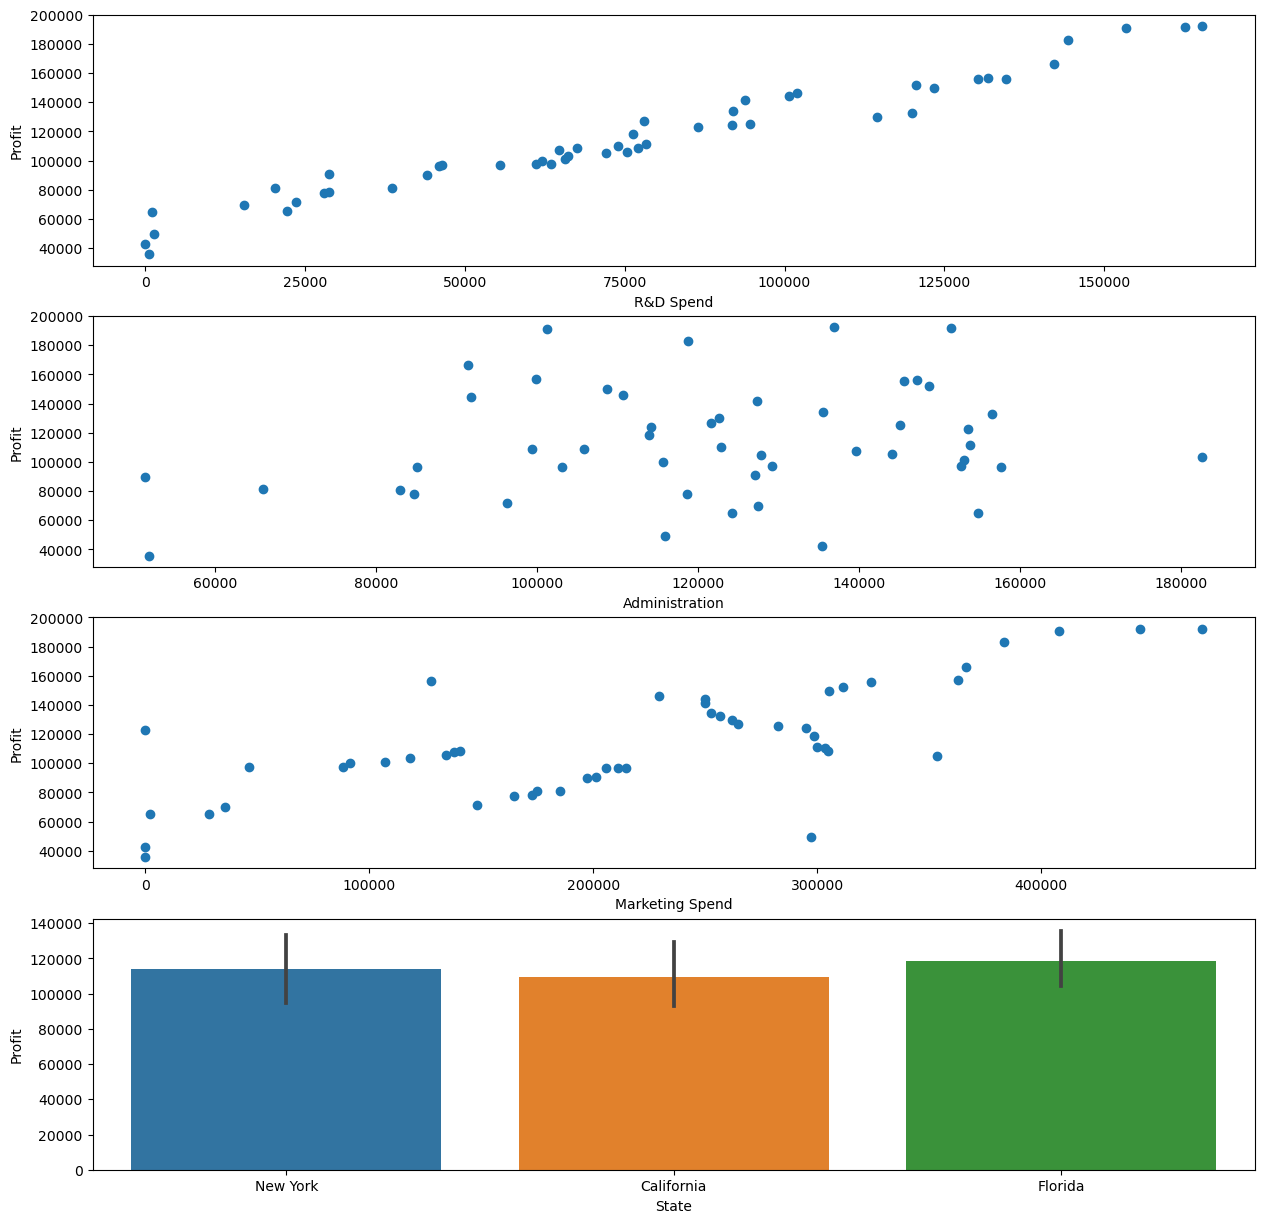

In [18]:
plt.figure(figsize=(15,15))
plt.subplot(4,1,1)
plt.scatter(df['R&D Spend'],df['Profit'])
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.subplot(4,1,2)
plt.scatter(df['Administration'],df['Profit'])
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.subplot(4,1,3)
plt.scatter(df['Marketing Spend'],df['Profit'])
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.subplot(4,1,4)
sns.barplot(x='State',y='Profit',data=df)

In [19]:
df=df.drop('State',axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        49 non-null     float64
 1   Administration   49 non-null     float64
 2   Marketing Spend  49 non-null     float64
 3   Profit           49 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [21]:
X=df[['R&D Spend','Administration','Marketing Spend']]
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [22]:
Y=df[['Profit']]
Y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [23]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.75,random_state=5)

### Linear Regression Model

In [24]:
linmodel=LinearRegression()

In [25]:
model1=linmodel.fit(x_train,y_train)

In [26]:
y_pred=linmodel.predict(x_test)
y_pred

array([[ 72665.82920959],
       [103016.56346621],
       [155660.3640374 ],
       [115280.55938037],
       [103723.89116153],
       [130494.47927575],
       [178750.91530662],
       [ 62970.52261108],
       [171141.24723011],
       [118791.95432354],
       [ 99045.84966007],
       [168872.99432219],
       [ 99398.00887946]])

In [27]:
model1.score(x_test,y_test)

0.9740140903472381

In [28]:
linmodel.intercept_,linmodel.coef_

(array([50068.77638551]),
 array([[7.53388733e-01, 6.78469988e-04, 3.18982793e-02]]))

In [29]:
sse= ((y_test-y_pred)**2).sum()
sst= ((y_test-y_pred.mean())**2).sum()
R21= 1-(sse/sst)
rmse1=np.sqrt(mean_squared_error(y_test,y_pred))

In [30]:
R21

Profit    0.974042
dtype: float64

In [31]:
rmse1

6160.7419532470785

<Axes: xlabel='Profit'>

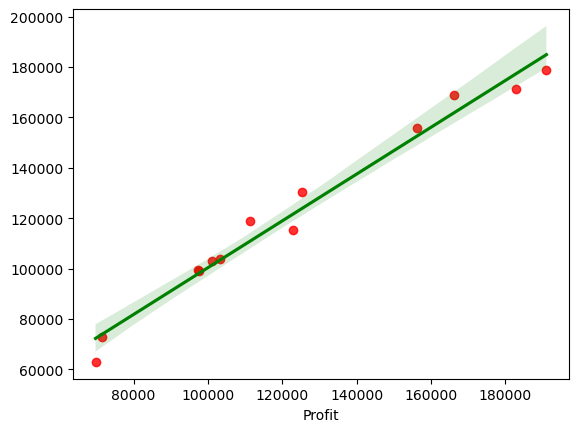

In [32]:
sns.regplot(data=df,x=y_test,y=y_pred,scatter_kws={'color':'red'},line_kws={'color':'green'})

### Ridge Regression Model

In [33]:
ridge=Ridge(alpha=1)
model2=ridge.fit(x_train,y_train)

In [34]:
y1_pred=model2.predict(x_test)
y1_pred

array([[ 72665.82921012],
       [103016.56346574],
       [155660.36403503],
       [115280.55937839],
       [103723.89116144],
       [130494.47927584],
       [178750.9153056 ],
       [ 62970.52261122],
       [171141.24722932],
       [118791.95432434],
       [ 99045.84965958],
       [168872.99432104],
       [ 99398.0088783 ]])

In [35]:
model2.score(x_test,y_test)

0.9740140903433586

In [36]:
ridge.intercept_,ridge.coef_

(array([50068.7763845]),
 array([[7.53388733e-01, 6.78469999e-04, 3.18982794e-02]]))

In [37]:
sse= ((y_test-y1_pred)**2).sum()
sst= ((y_test-y1_pred.mean())**2).sum()
R22= 1-(sse/sst)
rmse2=np.sqrt(mean_squared_error(y_test,y1_pred))

In [38]:
R22

Profit    0.974042
dtype: float64

In [39]:
rmse2

6160.74195370694

<Axes: xlabel='Profit'>

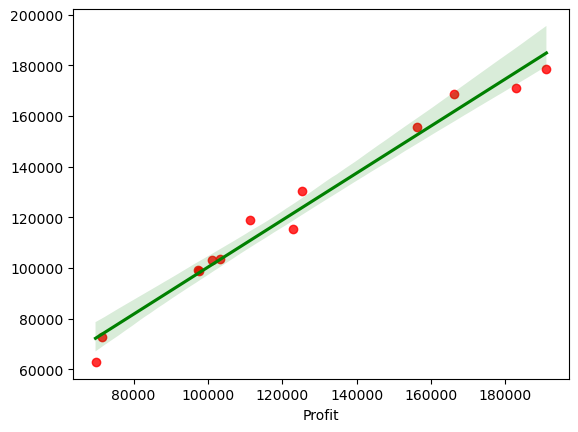

In [40]:
sns.regplot(data=df,x=y_test,y=y1_pred,scatter_kws={'color':'red'},line_kws={'color':'green'})

### Lasso Regression Model

In [41]:
elasnet=ElasticNet(alpha = .4,l1_ratio=.5) 

In [42]:
model3=elasnet.fit(x_train,y_train)

In [43]:
model3.score(x_train,y_train)

0.954445452203638

In [44]:
y2_pred=model3.predict(x_test)
y2_pred

array([ 72665.82920965, 103016.56346435, 155660.36405143, 115280.55939116,
       103723.89115131, 130494.47926957, 178750.91531599,  62970.52260961,
       171141.24723471, 118791.95431009,  99045.84965867, 168872.99433456,
        99398.00888778])

In [45]:
rmselas = np.sqrt(mean_squared_error(y_test,y2_pred))
rmselas

6160.741949005787

<Axes: xlabel='Profit'>

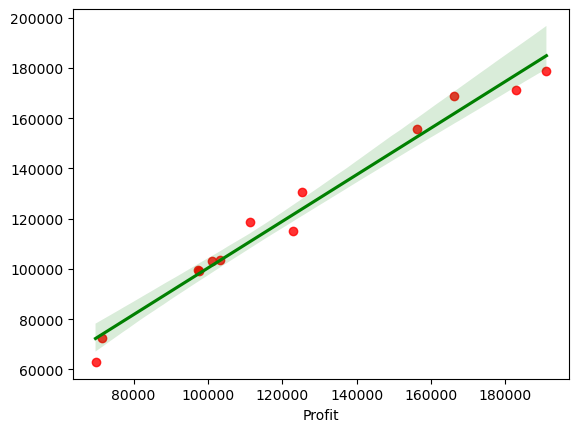

In [46]:
sns.regplot(data=df,x=y_test,y=y2_pred,scatter_kws={'color':'red'},line_kws={'color':'green'})

## Model Measures

In [47]:
measure=pd.DataFrame({'Model name':['Multi Regression Model','Ridge Regression Model','Lasso Regresion Model'],'Model Score':[model1.score(x_test,y_test),model2.score(x_test,y_test),model3.score(x_test,y_test)],'Model Score':[model1.score(x_test,y_test),model2.score(x_test,y_test),model3.score(x_test,y_test)],'RMSE':[rmse1,rmse2,rmselas],'R2':['0.974042','0.974042','0.974042']})
measure

,Model name,Model Score,RMSE,R2
0,Multi Regression Model,0.974014,6160.741953,0.974042
1,Ridge Regression Model,0.974014,6160.741954,0.974042
2,Lasso Regresion Model,0.974014,6160.741949,0.974042


#### Every model has same score,rmse and r squared value

## Therefore, All regression model are the best models